<a href="https://colab.research.google.com/github/shifiyasalam/CNN/blob/main/malwaredetectionfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
from google.colab import autoviz
import seaborn as sns


In [ ]:
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"shifiyasalam","key":"836cb36a37eb9c963a55b717b1b9f137"}'}

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                   title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
teocalvo/teomewhy-loyalty-system                                      TeoMeWhy Loyalty System                            22MB  2024-06-13 13:00:23             52        332  1.0              
rabieelkharoua/cancer-prediction-dataset                              🩺📊 Cancer Prediction Dataset 🌟🔬                    47KB  2024-06-10 03:54:18           1419         33  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data        Online Sales Dataset - Popular Marketplace Data     7KB  2024-05-25 23:55:26           6567        122  1.0              
muhammadroshaanriaz/e-commerce-trends-a-

In [ ]:
!kaggle datasets download -d sohamkumar1703/malevis-dataset

Dataset URL: https://www.kaggle.com/datasets/sohamkumar1703/malevis-dataset
License(s): unknown
malevis-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip malevis-dataset.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/malevis_train_val_300x300/val/Adposhel/f73fe023c9e448d2db5feae09a36652a7af86fedresized_image.png  
  inflating: train/malevis_train_val_300x300/val/Adposhel/f7a12363c4aefdfe3e209d599c4f67b07680c094resized_image.png  
  inflating: train/malevis_train_val_300x300/val/Adposhel/f89e5fc378142b7e595d30499a0d95d529f0c1d1resized_image.png  
  inflating: train/malevis_train_val_300x300/val/Adposhel/f94fae61ce46f1aa106ffc105d6dfde631047108resized_image.png  
  inflating: train/malevis_train_val_300x300/val/Adposhel/f9c02e71f1d20940572f5a193af57f11fbba8a95resized_image.png  
  inflating: train/malevis_train_val_300x300/val/Adposhel/f9d1e3dfc70b1fbc01a86515b6c59eae20cc0858resized_image.png  
  inflating: train/malevis_train_val_300x300/val/Adposhel/fa440d8624930396cc8ce9126169ca7cf9d9f333resized_image.png  
  inflating: train/malevis_train_val_300x300/val/Adposhel/fa487403f7a4b07c9b77c43efe8c05e645b346adresized_image.png  
  inf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import os

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/kaggle/input/malevis-dataset/malevis_train_val_300x300'

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/train/malevis_train_val_300x300/train')
validation = tf.keras.utils.image_dataset_from_directory('/content/train/malevis_train_val_300x300/val')

Found 9100 files belonging to 26 classes.
Found 5126 files belonging to 26 classes.


In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(os.path.join(data_dir, '/content/train/malevis_train_val_300x300/train'))
validation_data = tf.keras.utils.image_dataset_from_directory(os.path.join(data_dir, '/content/train/malevis_train_val_300x300/val'))

Found 9100 files belonging to 26 classes.
Found 5126 files belonging to 26 classes.


In [ ]:
class_labels = train_data.class_names

In [ ]:
data_iterator = data.as_numpy_iterator()
validation_iterator = validation.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

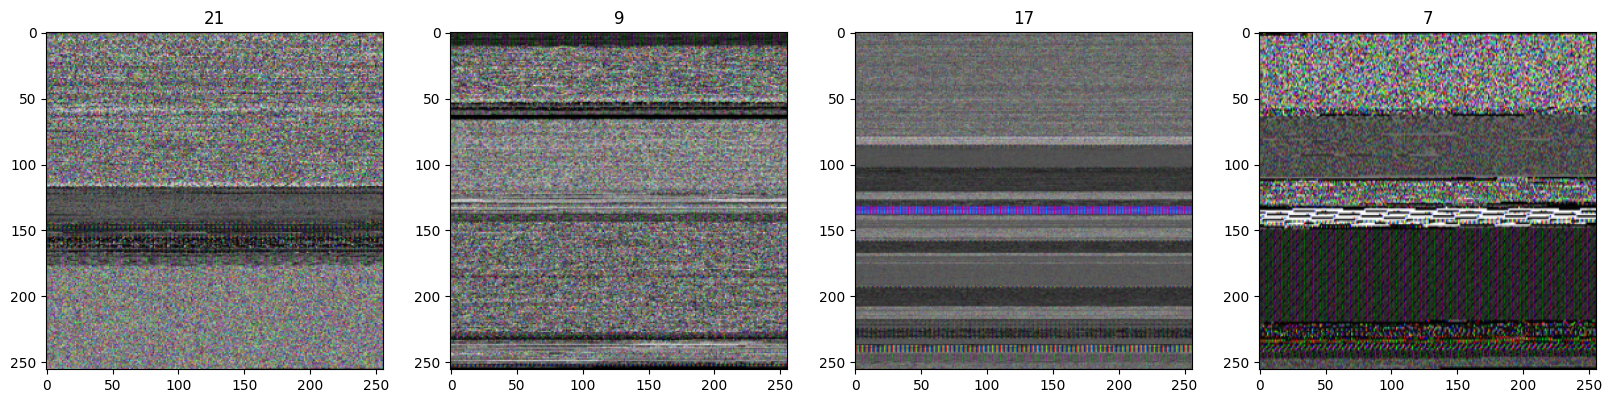

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))
validation= validation.map(lambda x,y:(x/255,y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[3.05589616e-01, 3.50531369e-01, 5.05499840e-01],
          [3.81084383e-02, 2.43472829e-02, 5.01460060e-02],
          [6.12515323e-02, 3.97329293e-02, 6.52982816e-02],
          ...,
          [5.00923932e-01, 9.11808252e-01, 8.52947891e-01],
          [5.17803133e-01, 6.20082974e-01, 9.33975041e-01],
          [3.07837158e-01, 1.93277031e-01, 7.67001510e-01]],
 
         [[7.20778763e-01, 8.54695380e-01, 2.69407988e-01],
          [5.07794082e-01, 3.50657731e-01, 6.02118492e-01],
          [7.56480038e-01, 4.79005098e-01, 6.76859081e-01],
          ...,
          [6.26728117e-01, 6.95419967e-01, 3.68102551e-01],
          [2.77992398e-01, 7.22107887e-01, 3.39471072e-01],
          [4.15194392e-01, 2.87880808e-01, 7.84220636e-01]],
 
         [[3.92112821e-01, 8.18719387e-01, 3.37875068e-01],
          [5.11428654e-01, 8.72733295e-01, 7.44251430e-01],
          [7.82847226e-01, 5.56409657e-01, 4.38108683e-01],
          ...,
          [5.39833248e-01, 6.11201048e-01, 4.7640

In [ ]:
train_size = int(len(data)*.8)
test_size = int(len(data)*.2)

In [ ]:
train_size+test_size

285

In [ ]:
train = data.take(train_size)
test = data.skip(train_size).take(test_size)

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Define the model
model = Sequential()

model.add(Conv2D(16, (3, 3), 1, input_shape=(300, 300, 3)))
model.add(LeakyReLU(alpha=0.1))  # You can adjust the alpha parameter
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))  # Adjust the dropout rate as needed
model.add(Dense(26, activation='softmax'))
initial_learning_rate = 0.005
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

# Compile the model
model.compile(optimizer=SGD(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 254, 254, 16)      0         
                                                                 
 batch_normalization (Batch  (None, 254, 254, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 125, 125, 32)     

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=5, validation_data=test, callbacks=[tensorboard_callback])

Epoch 1/5
228/228 [==============================] - 736s 3s/step - loss: 0.5356 - accuracy: 0.8542 - val_loss: 0.5381 - val_accuracy: 0.8731
Epoch 2/5
228/228 [==============================] - 746s 3s/step - loss: 0.3758 - accuracy: 0.8899 - val_loss: 0.4410 - val_accuracy: 0.8775
Epoch 3/5
228/228 [==============================] - 752s 3s/step - loss: 0.3039 - accuracy: 0.9191 - val_loss: 0.4510 - val_accuracy: 0.8725
Epoch 4/5
228/228 [==============================] - 747s 3s/step - loss: 0.2296 - accuracy: 0.9363 - val_loss: 0.3271 - val_accuracy: 0.9113
Epoch 5/5
228/228 [==============================] - 741s 3s/step - loss: 0.1756 - accuracy: 0.9519 - val_loss: 0.3952 - val_accuracy: 0.8980


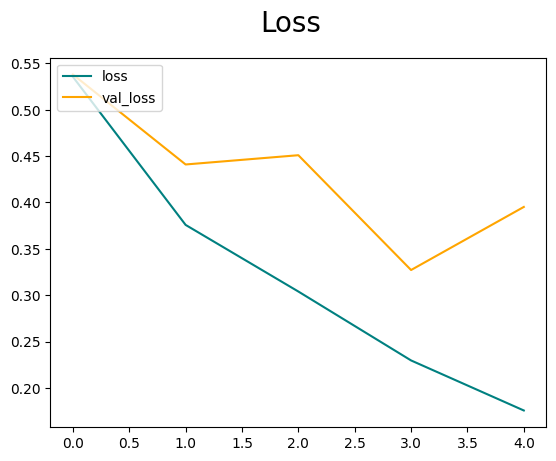

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
model.evaluate(test)

57/57 [==============================] - 76s 903ms/step - loss: 0.3888 - accuracy: 0.8980


[0.38880491256713867, 0.898004412651062]

In [ ]:
from tensorflow.keras.models import save_model

In [ ]:
model.save('/content/train/malevis_train1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
print("Training Dataset Class Names:")
print(class_labels)

Training Dataset Class Names:
['Adposhel', 'Agent', 'Allaple', 'Amonetize', 'Androm', 'Autorun', 'BrowseFox', 'Dinwod', 'Elex', 'Expiro', 'Fasong', 'HackKMS', 'Hlux', 'Injector', 'InstallCore', 'MultiPlug', 'Neoreklami', 'Neshta', 'Other', 'Regrun', 'Sality', 'Snarasite', 'Stantinko', 'VBA', 'VBKrypt', 'Vilsel']


In [ ]:
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(300, 300))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

In [ ]:
def classify_image(image_path):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)
    max_prob = np.max(predictions)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_index]
    return predicted_class, max_prob

In [ ]:
image_path = '/content/010e3d42f4a163706efb4a3f3c8e0f780d05621bresized_image (1).png'
predicted_class, max_prob = classify_image(image_path)
print(f"Predicted class: {predicted_class} with probability {max_prob}")

1/1 [==============================] - 0s 52ms/step
Predicted class: Hlux with probability 0.0404476635158062
